# LUNA experiment: grid search of regularization and diversification

In this notebook, we performed experiments on LUNA trained with 30 auxiliary functions with a grid search of regularization and diversification, and compared to results to NLM on the 1-D cubic gap dataset.

In [1]:
import time
import sys; sys.path.insert(0, "..")
import os; imagePath = os.path.abspath('..') + '/images/'
from src.models import NLM, LUNA
from src.utils import generate_data, format_time, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

## Generate toy data

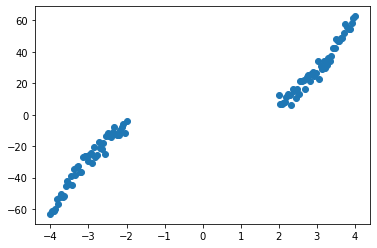

In [3]:
x, y, x_test, y_test = generate_data(number_of_points=50, noise_variance=9)
plt.scatter(x, y)
plt.show()

# Extract test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = y_test[gap_idx].reshape(1,-1)

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = y_test[non_gap_idx].reshape(1,-1)

## Define function for training NLM and LUNA

In [4]:
def experiment_LUNA_1D(n_aux, reg_param, lambda_in, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)
    
    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn,
        'auxiliary_functions': n_aux,
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param,
        'lambda_in': lambda_in,
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    luna = LUNA(architecture, random=random)
    print("")
    print(f"===== [ Aux Functions: {n_aux} ] === [ Regularization: {reg_param} ] === [ Diversification: {lambda_in} ] =====")
    print("")
    t0 = time.time()
    luna.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return luna

In [5]:
def experiment_NLM_1D(reg_param, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    nlm = NLM(architecture, random=random)
    print("")
    print(f"===== NLM [ Regularization: {reg_param} ]  =====")
    print("")
    t0 = time.time()
    nlm.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return nlm

## Set hyperparameters

In [6]:
n_aux = 30
reg_grid = [0., 10., 50., 100., 500., 1000., 5000.]
div_grid = [0., 10., 100., 1000., 10000.]

step_size = 1e-2
max_iteration_nlm = 5000
max_iteration_luna = 5000

## Fit with NLM and LUNA

In [7]:
nlm_list = []
for reg in reg_grid:
    nlm = experiment_NLM_1D(reg, step_size = step_size, max_iteration = max_iteration_nlm)
    nlm_list.append(nlm)


===== NLM [ Regularization: 0.0 ]  =====

Iteration 0 loss 8585.842301713321; gradient mag: 19680.173533004465
Iteration 100 loss 79.65204885797004; gradient mag: 66.46674659410365
Iteration 200 loss 21.2883509871193; gradient mag: 35.897454583790925
Iteration 300 loss 11.344716271890563; gradient mag: 3.466544603769554
Iteration 400 loss 11.122407452340244; gradient mag: 0.7113124318734225
Iteration 500 loss 11.11579426483929; gradient mag: 0.1142698758747726
Iteration 600 loss 11.11500227303168; gradient mag: 0.11657271084310895
Iteration 700 loss 11.114215403816315; gradient mag: 0.11114818516837845
Iteration 800 loss 11.113437896899217; gradient mag: 0.10482070788280709
Iteration 900 loss 11.11268501888595; gradient mag: 0.09825355326520957
Iteration 1000 loss 11.11196935251666; gradient mag: 0.09154236456340809
Iteration 1100 loss 11.111300795901718; gradient mag: 0.08476086586384536
Iteration 1200 loss 11.110686626011457; gradient mag: 0.07797957503553161
Iteration 1300 loss 11.

Iteration 1100 loss 31.419995844098118; gradient mag: 19.91150349036914
Iteration 1200 loss 30.84005868383635; gradient mag: 16.955609927926485
Iteration 1300 loss 30.27018661084214; gradient mag: 7.260235837541551
Iteration 1400 loss 29.737083713421807; gradient mag: 11.89110445422228
Iteration 1500 loss 29.269806296529854; gradient mag: 50.383674684470414
Iteration 1600 loss 28.746026174452297; gradient mag: 40.46227111033158
Iteration 1700 loss 28.221636874694713; gradient mag: 8.010612096266696
Iteration 1800 loss 27.774012906908695; gradient mag: 43.851245330831965
Iteration 1900 loss 27.24812896845554; gradient mag: 9.748506547258307
Iteration 2000 loss 26.821147819192994; gradient mag: 28.197400813804958
Iteration 2100 loss 26.340932403427058; gradient mag: 26.366603317238432
Iteration 2200 loss 25.88873637100209; gradient mag: 19.285593223574583
Iteration 2300 loss 25.478115858821255; gradient mag: 22.147364647924004
Iteration 2400 loss 25.023462234223985; gradient mag: 11.8531

Iteration 2400 loss 58.92490390704553; gradient mag: 6.035728877446404
Iteration 2500 loss 56.02688272631809; gradient mag: 6.6406124584143384
Iteration 2600 loss 53.34885689585505; gradient mag: 5.377478946481308
Iteration 2700 loss 50.88477213574376; gradient mag: 9.950788553172883
Iteration 2800 loss 48.60226597236601; gradient mag: 7.933201222920515
Iteration 2900 loss 46.50587884869271; gradient mag: 5.960193704664034
Iteration 3000 loss 44.57956650141168; gradient mag: 6.549871662170411
Iteration 3100 loss 42.814335675061514; gradient mag: 15.458879172969656
Iteration 3200 loss 41.218611006987786; gradient mag: 23.1328951635433
Iteration 3300 loss 39.701912009926126; gradient mag: 15.770424378896463
Iteration 3400 loss 38.34350952933342; gradient mag: 15.737808765288314
Iteration 3500 loss 37.11259560859995; gradient mag: 7.427297642330629
Iteration 3600 loss 36.005747765800024; gradient mag: 16.50911607760392
Iteration 3700 loss 34.93355889205266; gradient mag: 6.692440489655206

Iteration 3700 loss 149.18099532548555; gradient mag: 3.8575314837711514
Iteration 3800 loss 149.1115278872974; gradient mag: 5.956317169834517
Iteration 3900 loss 149.0344295853263; gradient mag: 4.5475538013025485
Iteration 4000 loss 148.96718407710864; gradient mag: 6.888286225237453
Iteration 4100 loss 148.8991889042444; gradient mag: 6.803472620022348
Iteration 4200 loss 148.8254637078874; gradient mag: 7.280803568391309
Iteration 4300 loss 148.7444614415214; gradient mag: 5.201524524239147
Iteration 4400 loss 148.6769213251729; gradient mag: 6.792228134760266
Iteration 4500 loss 148.60267820915985; gradient mag: 8.06022860846488
Iteration 4600 loss 148.49635487008632; gradient mag: 3.8555264922045933
Iteration 4700 loss 148.42461130904033; gradient mag: 8.433347684917655
Iteration 4800 loss 148.3441327554002; gradient mag: 11.334286466906681
Iteration 4900 loss 148.24020790897492; gradient mag: 8.145753038257505

Training took 0:04:07 (h:mm:ss)


In [11]:
luna_list = []
for div in div_grid:
    for reg in reg_grid:
        luna = experiment_LUNA_1D(n_aux, reg, div, step_size = step_size, max_iteration = max_iteration_luna)
        luna_list.append(luna)
        


===== [ Aux Functions: 30 ] === [ Regularization: 0.0 ] === [ Diversification: 0.0 ] =====

Iteration 0 loss 13028.249844329208; gradient mag: 7361.462079489261
Iteration 100 loss 105.20743661426197; gradient mag: 26.45132420732663
Iteration 200 loss 48.092275055803356; gradient mag: 16.44875831202476
Iteration 300 loss 22.081401905128306; gradient mag: 8.845722445337481
Iteration 400 loss 14.855616536111146; gradient mag: 5.244947122124576
Iteration 500 loss 12.456722002505446; gradient mag: 3.9889013164051326
Iteration 600 loss 11.50080385230647; gradient mag: 2.154514590362031
Iteration 700 loss 10.850675378107796; gradient mag: 1.4698654475908344
Iteration 800 loss 10.387044204098189; gradient mag: 2.4147705949476532
Iteration 900 loss 9.979170035335933; gradient mag: 1.318420025599274
Iteration 1000 loss 9.640595401637993; gradient mag: 3.4342198654260163
Iteration 1100 loss 9.364579128595691; gradient mag: 2.74308887303303
Iteration 1200 loss 9.142099644409406; gradient mag: 2.6

Iteration 1000 loss 37.00464028391626; gradient mag: 3.0805513824823554
Iteration 1100 loss 36.18929271263562; gradient mag: 2.839136719953068
Iteration 1200 loss 35.397424430595116; gradient mag: 5.754220307407409
Iteration 1300 loss 34.614805598915545; gradient mag: 3.6154973124553043
Iteration 1400 loss 33.85674416597632; gradient mag: 5.843233813291086
Iteration 1500 loss 33.1064133127574; gradient mag: 2.5026536226915037
Iteration 1600 loss 32.38806426474407; gradient mag: 6.162784566975104
Iteration 1700 loss 31.669336133712758; gradient mag: 2.781816914667861
Iteration 1800 loss 30.975873925612404; gradient mag: 1.5428981484575162
Iteration 1900 loss 30.30417182139731; gradient mag: 3.935877248599374
Iteration 2000 loss 29.647507738930177; gradient mag: 6.0174810973594175
Iteration 2100 loss 28.995391328331976; gradient mag: 7.226739310990062
Iteration 2200 loss 28.35203389207878; gradient mag: 3.981643165792397
Iteration 2300 loss 27.730419608213655; gradient mag: 2.23250992150

Iteration 2100 loss 71.00774808531565; gradient mag: 4.590015541675683
Iteration 2200 loss 68.15029754246217; gradient mag: 5.005382320442411
Iteration 2300 loss 65.5685463647844; gradient mag: 4.318075237179113
Iteration 2400 loss 63.264197498949585; gradient mag: 4.348978759096665
Iteration 2500 loss 61.2016838558001; gradient mag: 5.021342209690204
Iteration 2600 loss 59.32417106820219; gradient mag: 4.553614922361963
Iteration 2700 loss 57.62138054666849; gradient mag: 3.998663801841126
Iteration 2800 loss 56.078323796959246; gradient mag: 3.8951837977697985
Iteration 2900 loss 54.680952045460764; gradient mag: 3.158798613554437
Iteration 3000 loss 53.421288993201095; gradient mag: 4.453514248559175
Iteration 3100 loss 52.26328665443057; gradient mag: 4.677667229665427
Iteration 3200 loss 51.2306016337529; gradient mag: 3.028531696326376
Iteration 3300 loss 50.284169913497124; gradient mag: 3.5678071604983894
Iteration 3400 loss 49.44031924696754; gradient mag: 2.2382915835447115
I

Iteration 3300 loss 222.92378276978764; gradient mag: 3.0803343553597045
Iteration 3400 loss 222.91640825489054; gradient mag: 3.9159287402776637
Iteration 3500 loss 222.9182309277756; gradient mag: 2.670157817899133
Iteration 3600 loss 222.9098041543977; gradient mag: 5.217267309117042
Iteration 3700 loss 222.93107927429156; gradient mag: 3.2581843026520105
Iteration 3800 loss 222.9083920382132; gradient mag: 2.931555688391448
Iteration 3900 loss 222.91240000954537; gradient mag: 3.0726931479057153
Iteration 4000 loss 222.92246951126157; gradient mag: 3.8933080453275246
Iteration 4100 loss 222.92950202116933; gradient mag: 0.7877162886068311
Iteration 4200 loss 222.92749718679096; gradient mag: 2.987360888627061
Iteration 4300 loss 222.9123037365381; gradient mag: 2.932038136661679
Iteration 4400 loss 222.9187098539738; gradient mag: 2.940955792993852
Iteration 4500 loss 222.9147899895811; gradient mag: 8.919086657925677
Iteration 4600 loss 222.91022227406262; gradient mag: 0.08172962

Iteration 4400 loss 22.26950173172543; gradient mag: 2.9619875109257157
Iteration 4500 loss 22.177285098436688; gradient mag: 9.901449858944172
Iteration 4600 loss 22.047162654735672; gradient mag: 3.4239692162736075
Iteration 4700 loss 22.004678957568583; gradient mag: 4.388793738953672
Iteration 4800 loss 21.928767502702744; gradient mag: 3.0854173774067
Iteration 4900 loss 21.849248200236737; gradient mag: 5.097203401233847

Training took 0:07:59 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 50.0 ] === [ Diversification: 10.0 ] =====

Iteration 0 loss 13087.492725264234; gradient mag: 7363.082695119477
Iteration 100 loss 144.68673970253528; gradient mag: 31.847487824757657
Iteration 200 loss 84.28883139882589; gradient mag: 13.411903530842395
Iteration 300 loss 58.909462287945544; gradient mag: 6.4301027922044725
Iteration 400 loss 55.40561845897592; gradient mag: 4.872820798783558
Iteration 500 loss 52.153499602985256; gradient mag: 4.941072959560173
Iteration 600 lo

Iteration 400 loss 250.71077927500352; gradient mag: 10.79449554912056
Iteration 500 loss 227.08947196217815; gradient mag: 9.662471026152222
Iteration 600 loss 206.99145558500868; gradient mag: 9.1242819095357
Iteration 700 loss 189.5990939948333; gradient mag: 8.6143926829861
Iteration 800 loss 174.4013172302382; gradient mag: 9.444800883996162
Iteration 900 loss 161.11602768986455; gradient mag: 7.782231187996996
Iteration 1000 loss 149.4028496868477; gradient mag: 7.7605714316531325
Iteration 1100 loss 139.05765409025085; gradient mag: 7.9478414437622265
Iteration 1200 loss 130.00385331448058; gradient mag: 9.66054029727391
Iteration 1300 loss 121.79741409151958; gradient mag: 6.20208586557208
Iteration 1400 loss 114.53276541821424; gradient mag: 6.664666325514414
Iteration 1500 loss 107.90985785198195; gradient mag: 6.295630393902869
Iteration 1600 loss 102.15109849163957; gradient mag: 5.086201169668666
Iteration 1700 loss 97.08897521034429; gradient mag: 5.897279418531357
Iterat

Iteration 1600 loss 240.94276289210177; gradient mag: 11.789799250302421
Iteration 1700 loss 238.7556496780043; gradient mag: 11.171585264781376
Iteration 1800 loss 237.18363480350422; gradient mag: 10.432175366646605
Iteration 1900 loss 236.0536166127073; gradient mag: 17.18925686085244
Iteration 2000 loss 235.1612095726739; gradient mag: 12.774254272678364
Iteration 2100 loss 234.5961001332639; gradient mag: 11.029474104288889
Iteration 2200 loss 234.26004353418045; gradient mag: 13.157913098959357
Iteration 2300 loss 233.7889422603386; gradient mag: 11.181016645429523
Iteration 2400 loss 233.5072952826989; gradient mag: 14.841596774134391
Iteration 2500 loss 233.3238886853095; gradient mag: 7.652332730004131
Iteration 2600 loss 233.17644130229363; gradient mag: 9.178205319798934
Iteration 2700 loss 233.08173039772868; gradient mag: 3.5724988114706306
Iteration 2800 loss 233.039125812221; gradient mag: 4.996879021957675
Iteration 2900 loss 232.9825332196799; gradient mag: 3.926814490

Iteration 2700 loss 117.0620007237789; gradient mag: 26.723157503926757
Iteration 2800 loss 115.68892830636047; gradient mag: 26.660988679280514
Iteration 2900 loss 115.48059133334388; gradient mag: 22.2536496769373
Iteration 3000 loss 117.89147816076752; gradient mag: 78.37118832449823
Iteration 3100 loss 115.26031572310659; gradient mag: 75.2332631581288
Iteration 3200 loss 115.74251594555409; gradient mag: 33.606181529330165
Iteration 3300 loss 114.85778457478781; gradient mag: 83.87505752679488
Iteration 3400 loss 115.54137413119479; gradient mag: 48.29378433868865
Iteration 3500 loss 114.7973066597298; gradient mag: 39.13731709209153
Iteration 3600 loss 115.50024271086757; gradient mag: 66.41855082226171
Iteration 3700 loss 114.55477910615855; gradient mag: 29.904318159188378
Iteration 3800 loss 114.38473690263308; gradient mag: 11.646512777683338
Iteration 3900 loss 139.8001037818698; gradient mag: 276.5227514781642
Iteration 4000 loss 114.64145423718584; gradient mag: 25.8632068

Iteration 3800 loss 134.357039877964; gradient mag: 76.62589580078372
Iteration 3900 loss 136.2084386497865; gradient mag: 14.863074552955643
Iteration 4000 loss 134.12014327143913; gradient mag: 39.03481558117853
Iteration 4100 loss 133.44908855591535; gradient mag: 14.076059610156062
Iteration 4200 loss 132.21809455154727; gradient mag: 32.18174384192124
Iteration 4300 loss 131.7897060594811; gradient mag: 9.761610505294406
Iteration 4400 loss 131.01086869176072; gradient mag: 11.603338154728172
Iteration 4500 loss 131.5057401671031; gradient mag: 28.509082755017488
Iteration 4600 loss 130.63141934160768; gradient mag: 17.032341415650638
Iteration 4700 loss 131.35778380429144; gradient mag: 41.51918991791755
Iteration 4800 loss 130.19846355148513; gradient mag: 82.29439387885654
Iteration 4900 loss 131.57327429238637; gradient mag: 50.77584165999491

Training took 0:07:15 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 500.0 ] === [ Diversification: 100.0 ] =====

Iterat

Iteration 4900 loss 196.8119010313911; gradient mag: 20.1816921578418

Training took 0:06:53 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 5000.0 ] === [ Diversification: 100.0 ] =====

Iteration 0 loss 18117.225798644147; gradient mag: 7399.415073234008
Iteration 100 loss 2656.962331746346; gradient mag: 122.15447920806893
Iteration 200 loss 1611.3230989077588; gradient mag: 84.70586299711961
Iteration 300 loss 1116.9711397188373; gradient mag: 79.52930026446542
Iteration 400 loss 847.7125874283508; gradient mag: 63.49619133937562
Iteration 500 loss 689.5550881197137; gradient mag: 43.79598125314127
Iteration 600 loss 590.8354543361271; gradient mag: 32.39920566449878
Iteration 700 loss 528.0374552223903; gradient mag: 28.740032580439337
Iteration 800 loss 486.91796588859586; gradient mag: 23.661901253133514
Iteration 900 loss 459.92243842261126; gradient mag: 20.910502060012945
Iteration 1000 loss 440.7434063649838; gradient mag: 40.38907605324862
Iteration 1100 loss 4

Iteration 900 loss 635.2453352541356; gradient mag: 304.9848565423004
Iteration 1000 loss 635.0086140507506; gradient mag: 382.5501959549888
Iteration 1100 loss 634.2201468469317; gradient mag: 88.8000504068706
Iteration 1200 loss 634.9701489594669; gradient mag: 439.74173612532644
Iteration 1300 loss 634.4833691492963; gradient mag: 321.93891420071384
Iteration 1400 loss 635.0050010118377; gradient mag: 472.2906592175702
Iteration 1500 loss 634.6714257778915; gradient mag: 340.1221464306661
Iteration 1600 loss 635.7957666333194; gradient mag: 629.5915145849888
Iteration 1700 loss 634.5464172425852; gradient mag: 393.38901503048635
Iteration 1800 loss 634.6671618987365; gradient mag: 423.9063729785423
Iteration 1900 loss 633.7283935901829; gradient mag: 100.81229224261648
Iteration 2000 loss 633.6338288627248; gradient mag: 55.800798621095005
Iteration 2100 loss 633.6991079853179; gradient mag: 147.81852191654204
Iteration 2200 loss 634.9239677215855; gradient mag: 416.97204446721054
I

Iteration 2100 loss 676.2574987946108; gradient mag: 155.76218518913586
Iteration 2200 loss 676.1625297399808; gradient mag: 392.3389457373856
Iteration 2300 loss 675.0896574109652; gradient mag: 294.8516056744571
Iteration 2400 loss 673.5935319265999; gradient mag: 238.8417454529701
Iteration 2500 loss 672.3431257702963; gradient mag: 150.44389581291298
Iteration 2600 loss 671.6680472708077; gradient mag: 215.79125509680324
Iteration 2700 loss 670.5635191210845; gradient mag: 171.17486806073046
Iteration 2800 loss 670.7734163936908; gradient mag: 412.85377089512644
Iteration 2900 loss 669.1865985132183; gradient mag: 269.11214155139146
Iteration 3000 loss 667.8476861985714; gradient mag: 94.17746864630956
Iteration 3100 loss 667.3364699868288; gradient mag: 222.9492407437082
Iteration 3200 loss 667.7393861707246; gradient mag: 425.3723450514549
Iteration 3300 loss 666.1601495573963; gradient mag: 265.62161537776467
Iteration 3400 loss 665.4350978540956; gradient mag: 252.4604652885505

Iteration 3300 loss 717.7467627668424; gradient mag: 440.4927785132613
Iteration 3400 loss 713.9679757023601; gradient mag: 56.67233146695799
Iteration 3500 loss 717.0836776639126; gradient mag: 579.6621637350426
Iteration 3600 loss 713.7438281845823; gradient mag: 337.48142957338996
Iteration 3700 loss 712.6355808445119; gradient mag: 301.73318137811407
Iteration 3800 loss 711.4884945969932; gradient mag: 174.66016259924595
Iteration 3900 loss 711.3812801245488; gradient mag: 196.97021030319067
Iteration 4000 loss 710.5407054542435; gradient mag: 179.15158857305934
Iteration 4100 loss 709.9515076342141; gradient mag: 94.29498663292739
Iteration 4200 loss 710.3715952894939; gradient mag: 110.75977039853406
Iteration 4300 loss 711.1585028475488; gradient mag: 425.04353381211143
Iteration 4400 loss 710.9577246907684; gradient mag: 412.09909128963056
Iteration 4500 loss 708.2494756285994; gradient mag: 111.43689751403892
Iteration 4600 loss 709.0461181262192; gradient mag: 172.08104367722

Iteration 4500 loss 4976.558368212445; gradient mag: 881.6344836991059
Iteration 4600 loss 4986.853375639078; gradient mag: 3676.6524887952564
Iteration 4700 loss 4979.353534493445; gradient mag: 1996.1020984506954
Iteration 4800 loss 4980.592405493935; gradient mag: 2387.909621945267
Iteration 4900 loss 7171.16977141429; gradient mag: 8355.872635442987

Training took 0:07:42 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 10.0 ] === [ Diversification: 10000.0 ] =====

Iteration 0 loss 22308.139414407167; gradient mag: 11086.8507953803
Iteration 100 loss 5273.312598195169; gradient mag: 4295.668398714692
Iteration 200 loss 5152.113489919796; gradient mag: 2748.8683077694945
Iteration 300 loss 5086.412288910591; gradient mag: 5518.819249616606
Iteration 400 loss 5046.755674235836; gradient mag: 1413.2167399096152
Iteration 500 loss 5042.190638804013; gradient mag: 1395.2553078455726
Iteration 600 loss 5146.672037519772; gradient mag: 6174.832132252876
Iteration 700 loss 503

Iteration 500 loss 5178.346479349394; gradient mag: 5241.390881101135
Iteration 600 loss 5178.675067933236; gradient mag: 4258.672678439835
Iteration 700 loss 5083.948130881622; gradient mag: 1238.2003367686677
Iteration 800 loss 5082.888983605152; gradient mag: 1707.4682120316152
Iteration 900 loss 5106.401568959422; gradient mag: 4213.61450924314
Iteration 1000 loss 5087.729995422525; gradient mag: 3234.32877006523
Iteration 1100 loss 5070.49239243089; gradient mag: 761.1384706000864
Iteration 1200 loss 5079.257632326347; gradient mag: 3444.875129542037
Iteration 1300 loss 5064.435333158019; gradient mag: 1159.0069064189893
Iteration 1400 loss 5098.880755464159; gradient mag: 4833.13827418825
Iteration 1500 loss 5058.983231526288; gradient mag: 947.5748501984239
Iteration 1600 loss 5055.196232619523; gradient mag: 143.31494939995
Iteration 1700 loss 5056.250667539605; gradient mag: 1727.0890337474505
Iteration 1800 loss 5443.850335866672; gradient mag: 8937.818530941082
Iteration 190

Iteration 1700 loss 5332.117277358454; gradient mag: 1686.070961976161
Iteration 1800 loss 5320.892334620737; gradient mag: 2099.0228656896497
Iteration 1900 loss 5345.003412659962; gradient mag: 5778.030208510323
Iteration 2000 loss 5297.281044261897; gradient mag: 1303.575557549565
Iteration 2100 loss 5292.141809562715; gradient mag: 2749.250124419064
Iteration 2200 loss 5290.542726348295; gradient mag: 3883.566563158783
Iteration 2300 loss 5265.659238360605; gradient mag: 958.4757943363401
Iteration 2400 loss 5266.777289965286; gradient mag: 3280.946706839717
Iteration 2500 loss 5259.252029351511; gradient mag: 3144.487579081825
Iteration 2600 loss 5303.973661712916; gradient mag: 5343.805855161846
Iteration 2700 loss 5232.878848999316; gradient mag: 37.95362540675648
Iteration 2800 loss 5234.060788354297; gradient mag: 2631.4799312776026
Iteration 2900 loss 5218.4068898909645; gradient mag: 79.70410335870537
Iteration 3000 loss 5212.914770751171; gradient mag: 276.83016985799793
It

## Plot auxiliary functions after fitting

In [14]:
import os; imagePath = os.path.abspath('..') + '/images/'

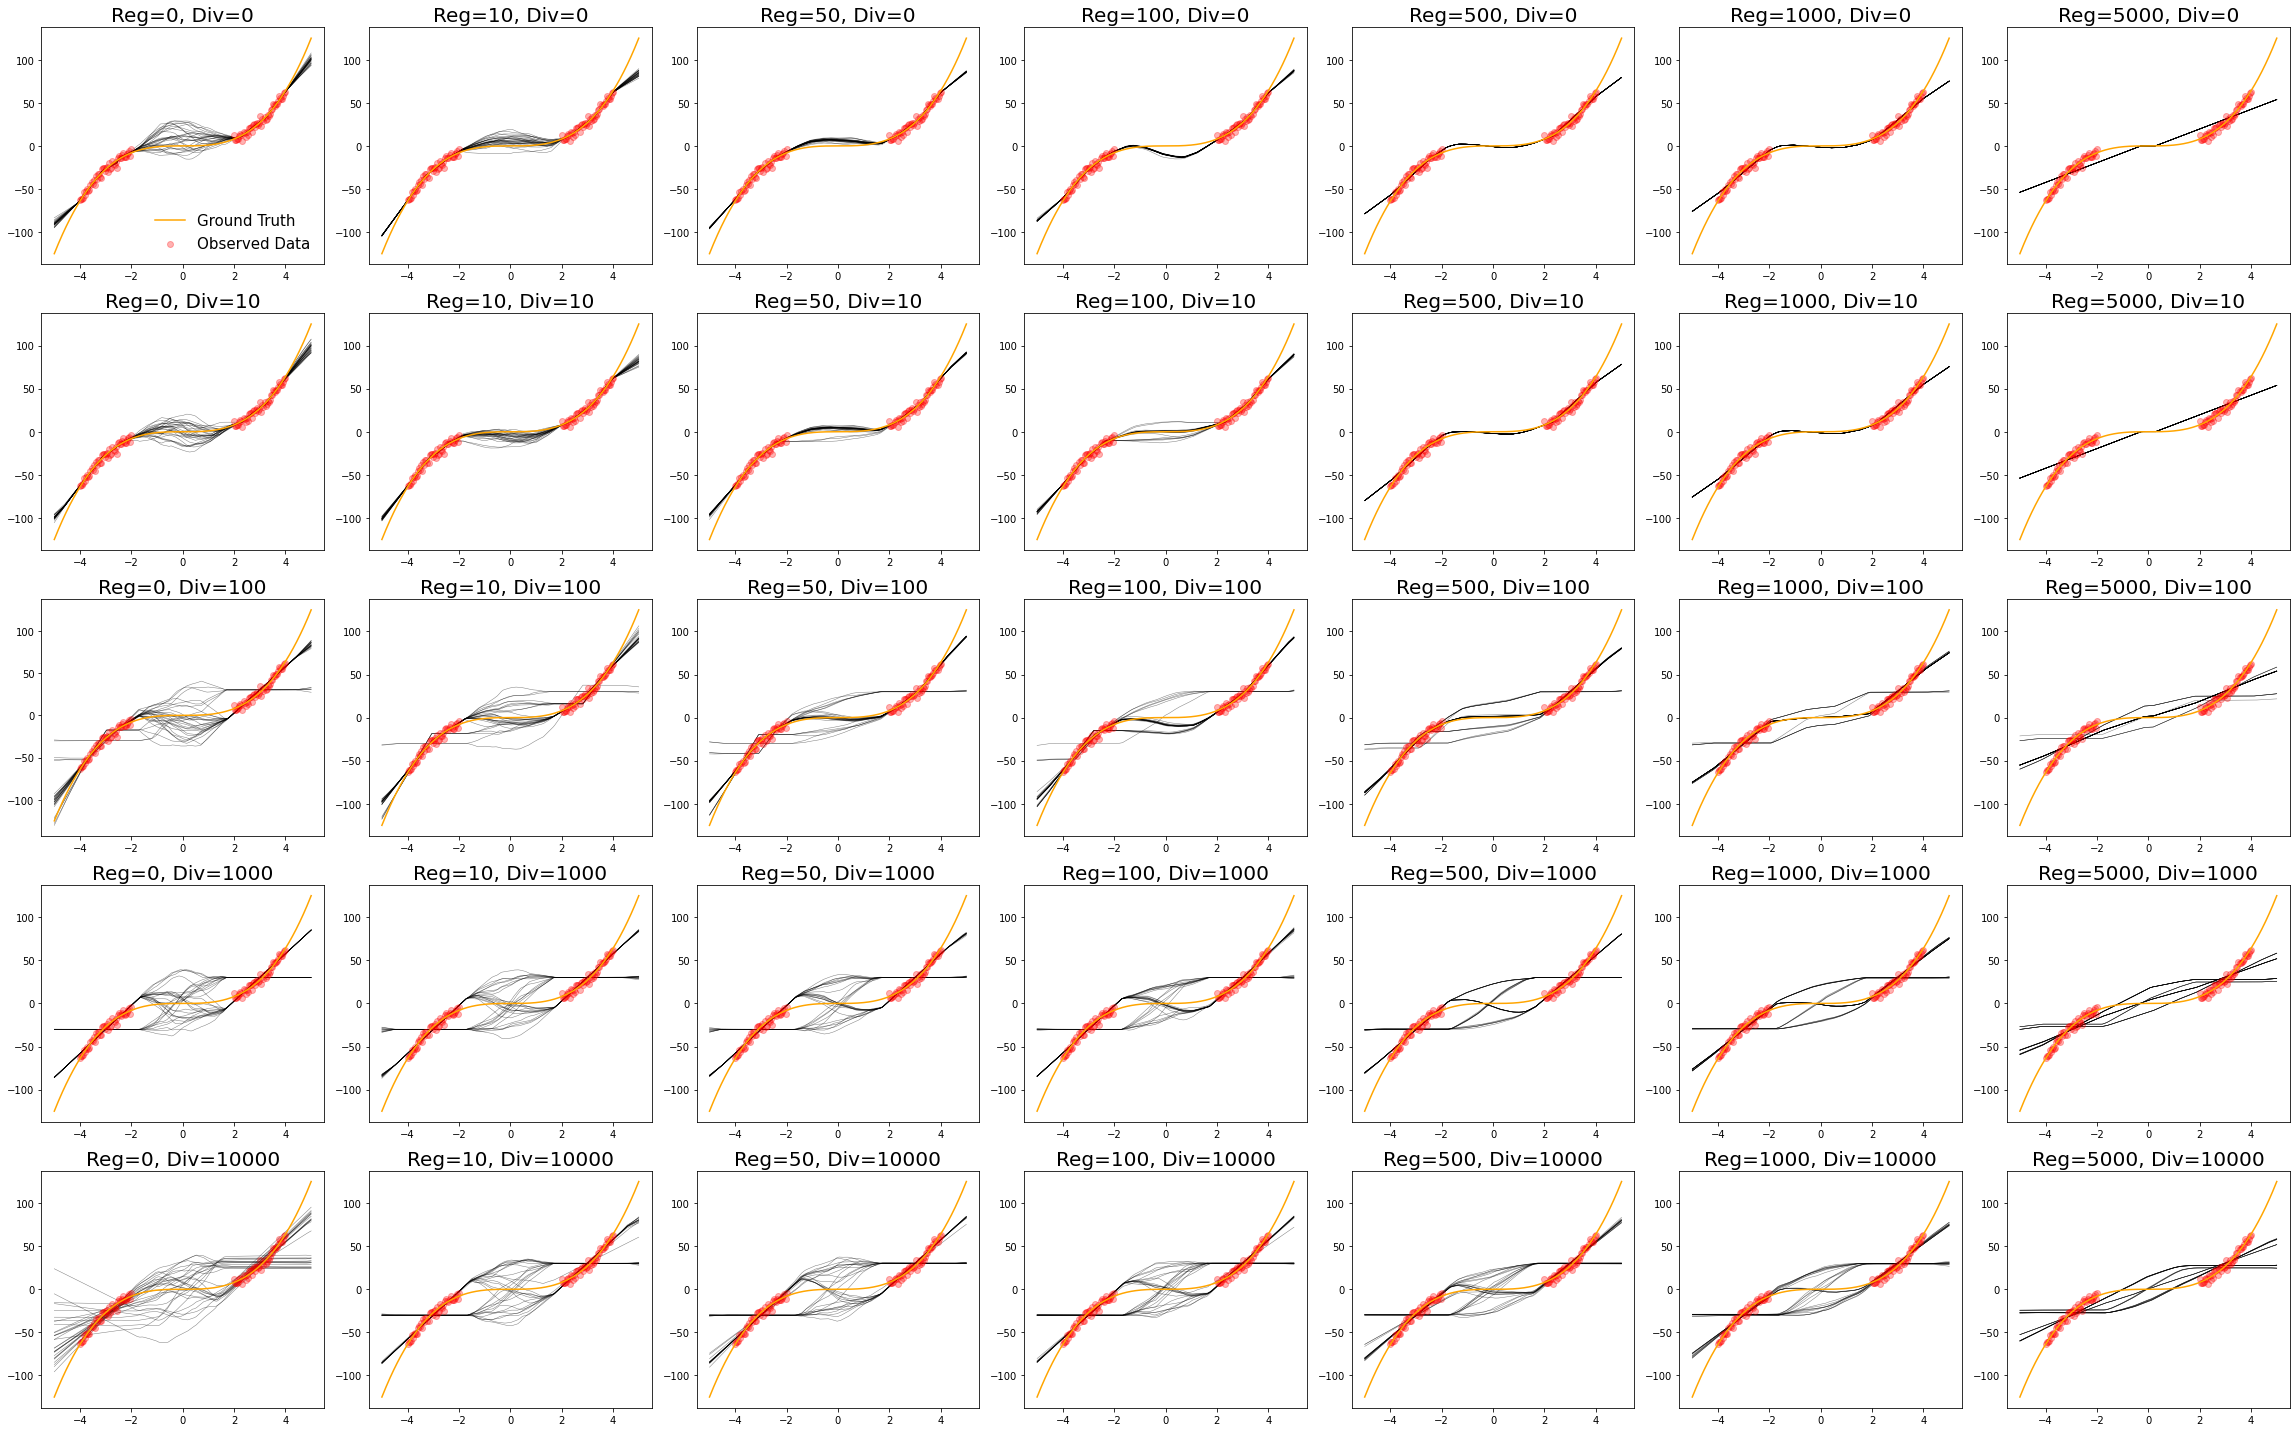

In [15]:
fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_pred = luna.forward(luna.weights, x_test)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], np.squeeze(y_pred).T, color='black', linewidth=0.5, alpha=0.5, zorder=0)
#     ax.set_title(f"Auxiliary Functions\n[Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]",fontsize = 20)
    ax.set_title(f"Reg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize = 20)
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'aux_funcs_30_aux_5000_steps-3.png',dpi = 150)
plt.show()

## Plot prior samples

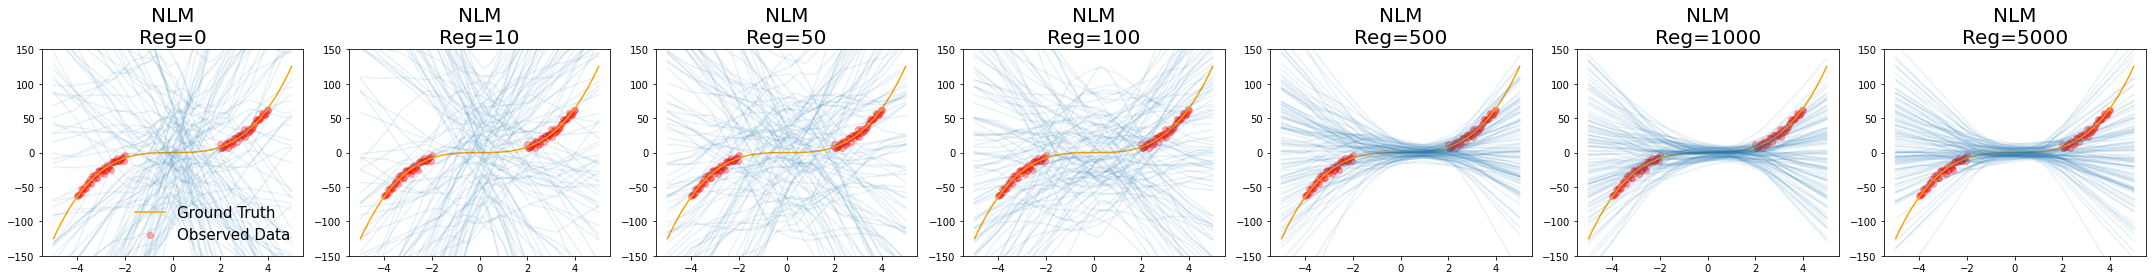

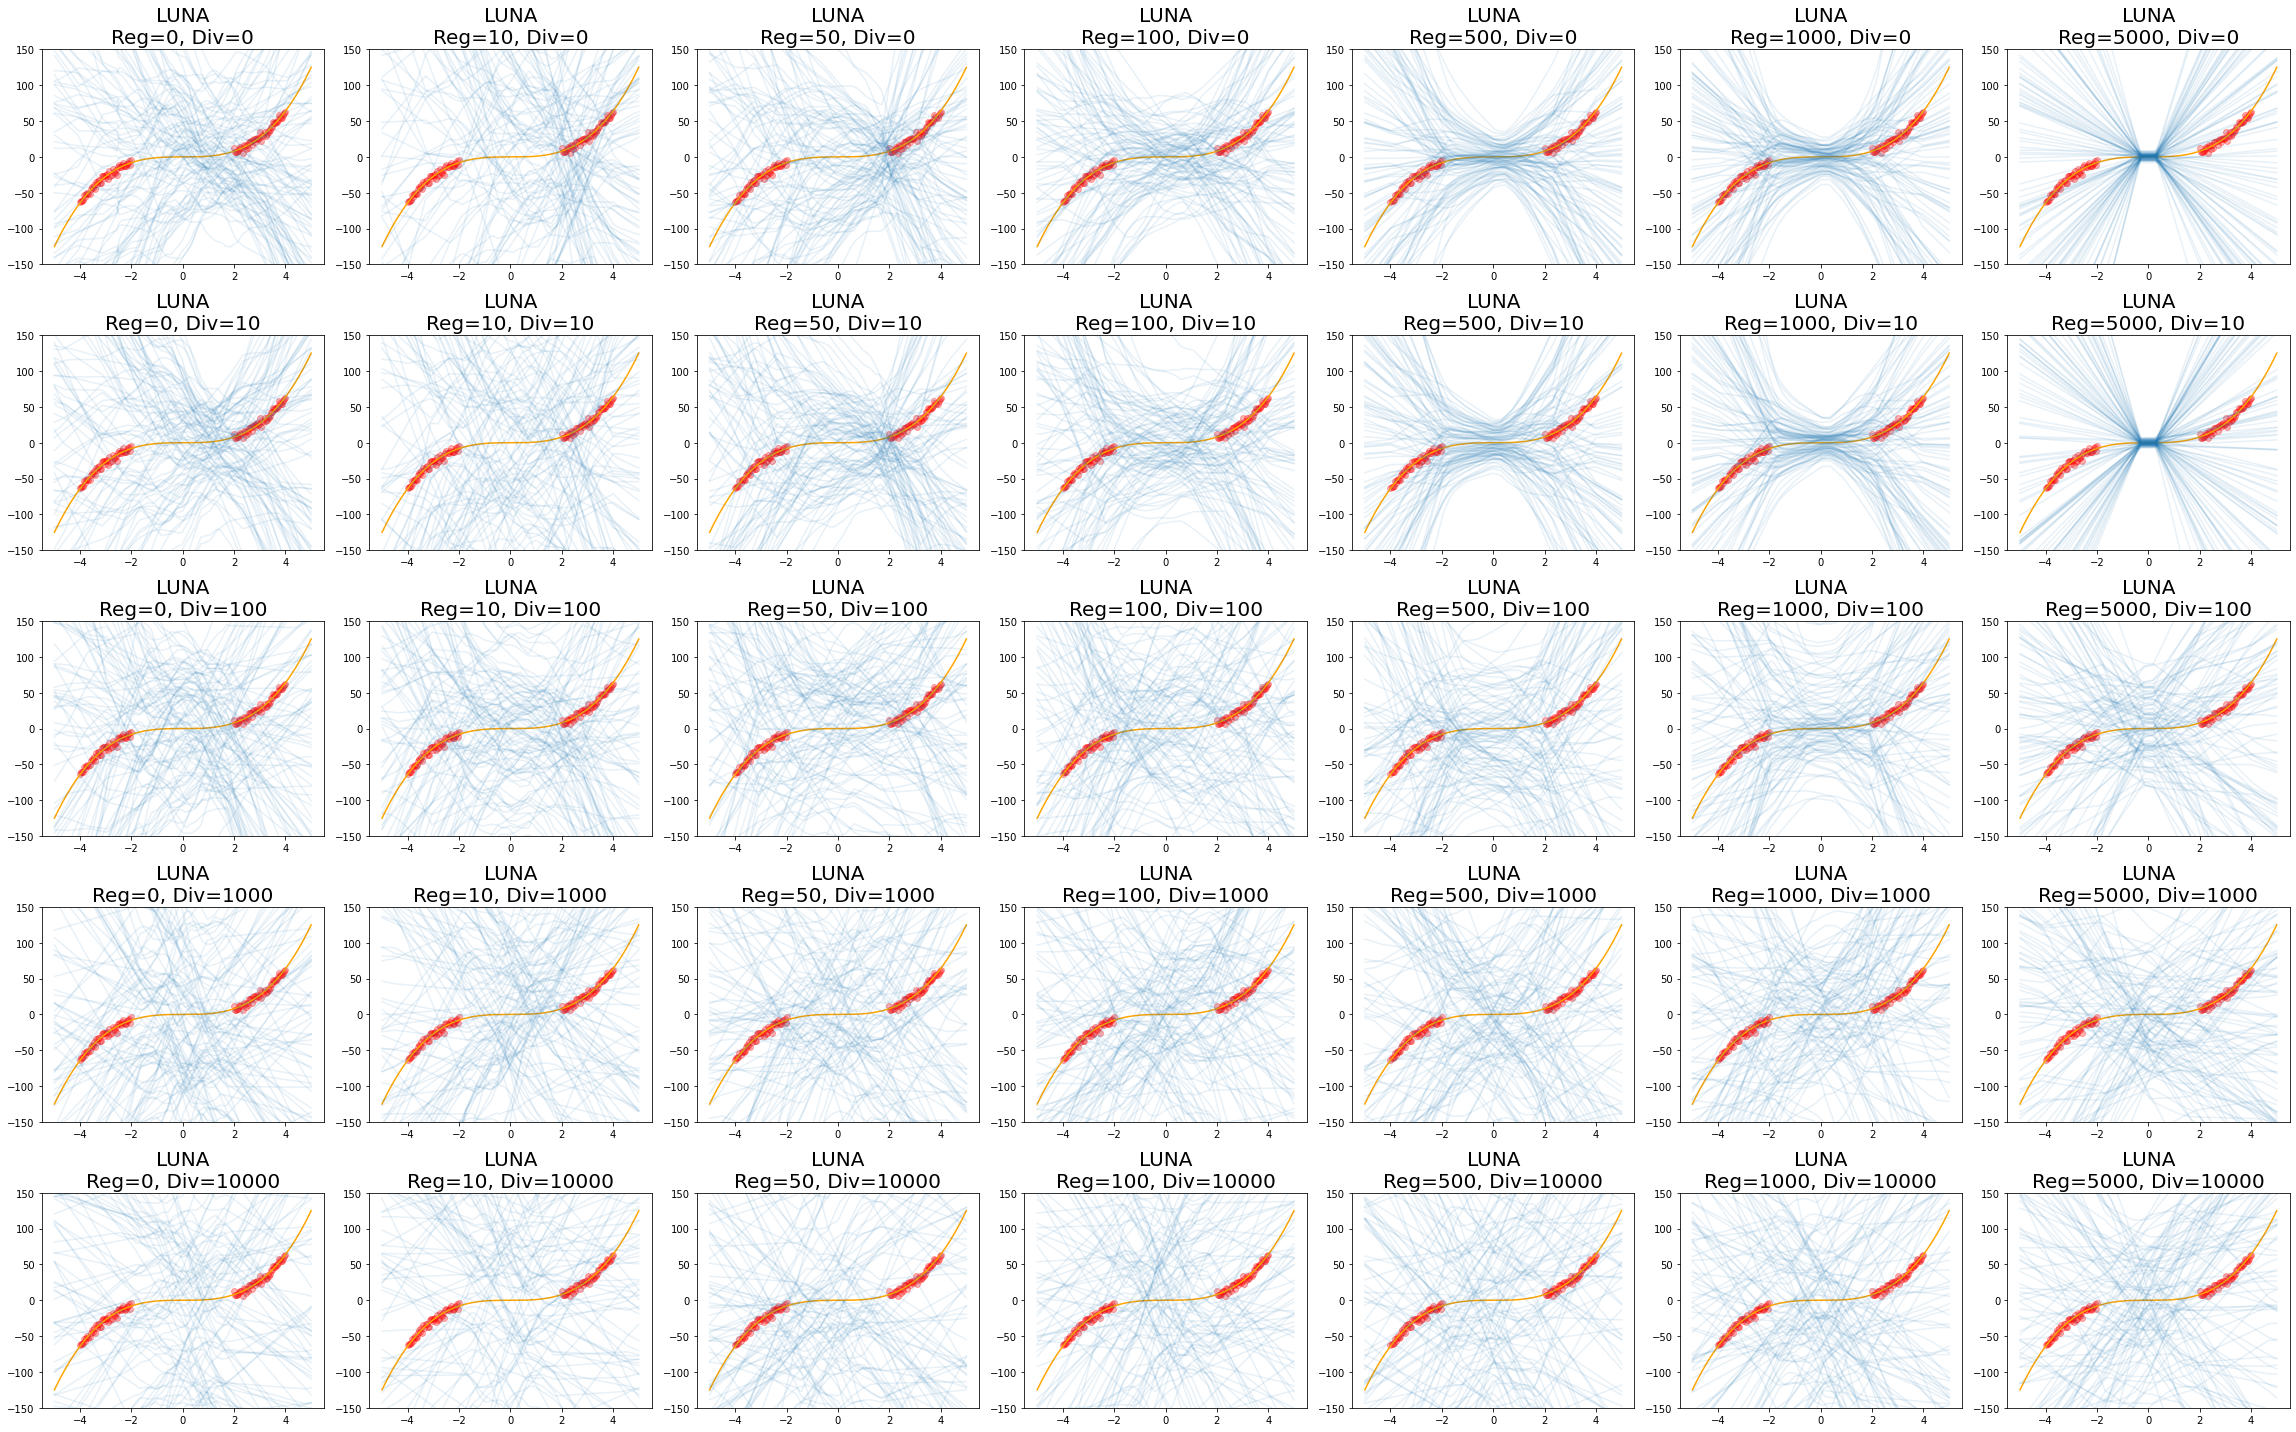

In [16]:
prior_mean = 0; prior_var = 9; noise_var = 9

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize = 20)
    ax.set_ylim([-150, 150])
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon=False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'prior_samples_NLM_30_aux_5000_steps-3.png',dpi = 150)
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_prior = luna.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]",fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon=False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'prior_samples_LUNA_30_aux_5000_steps-3.png',dpi = 150)
plt.show()

## Plot posterior samples

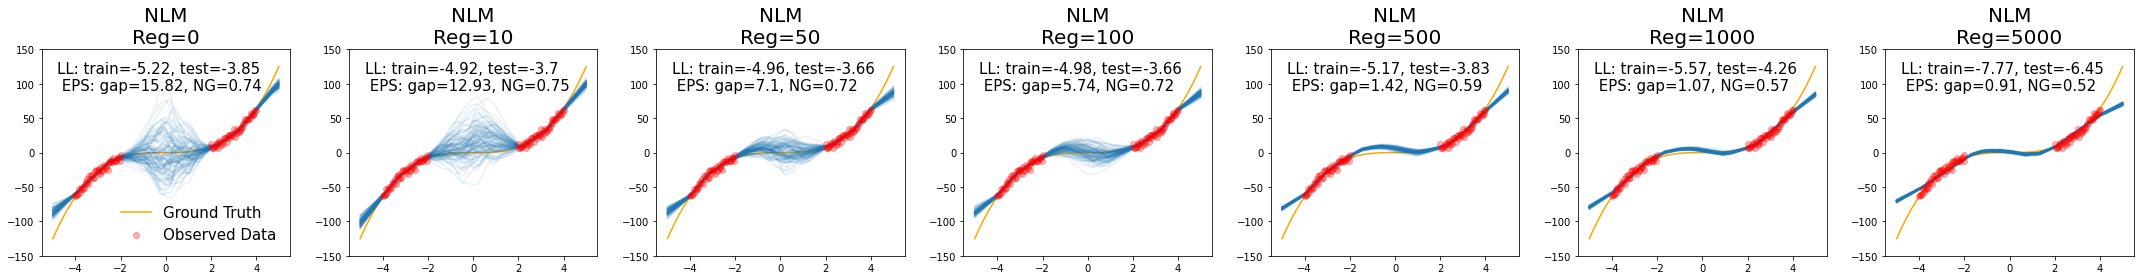

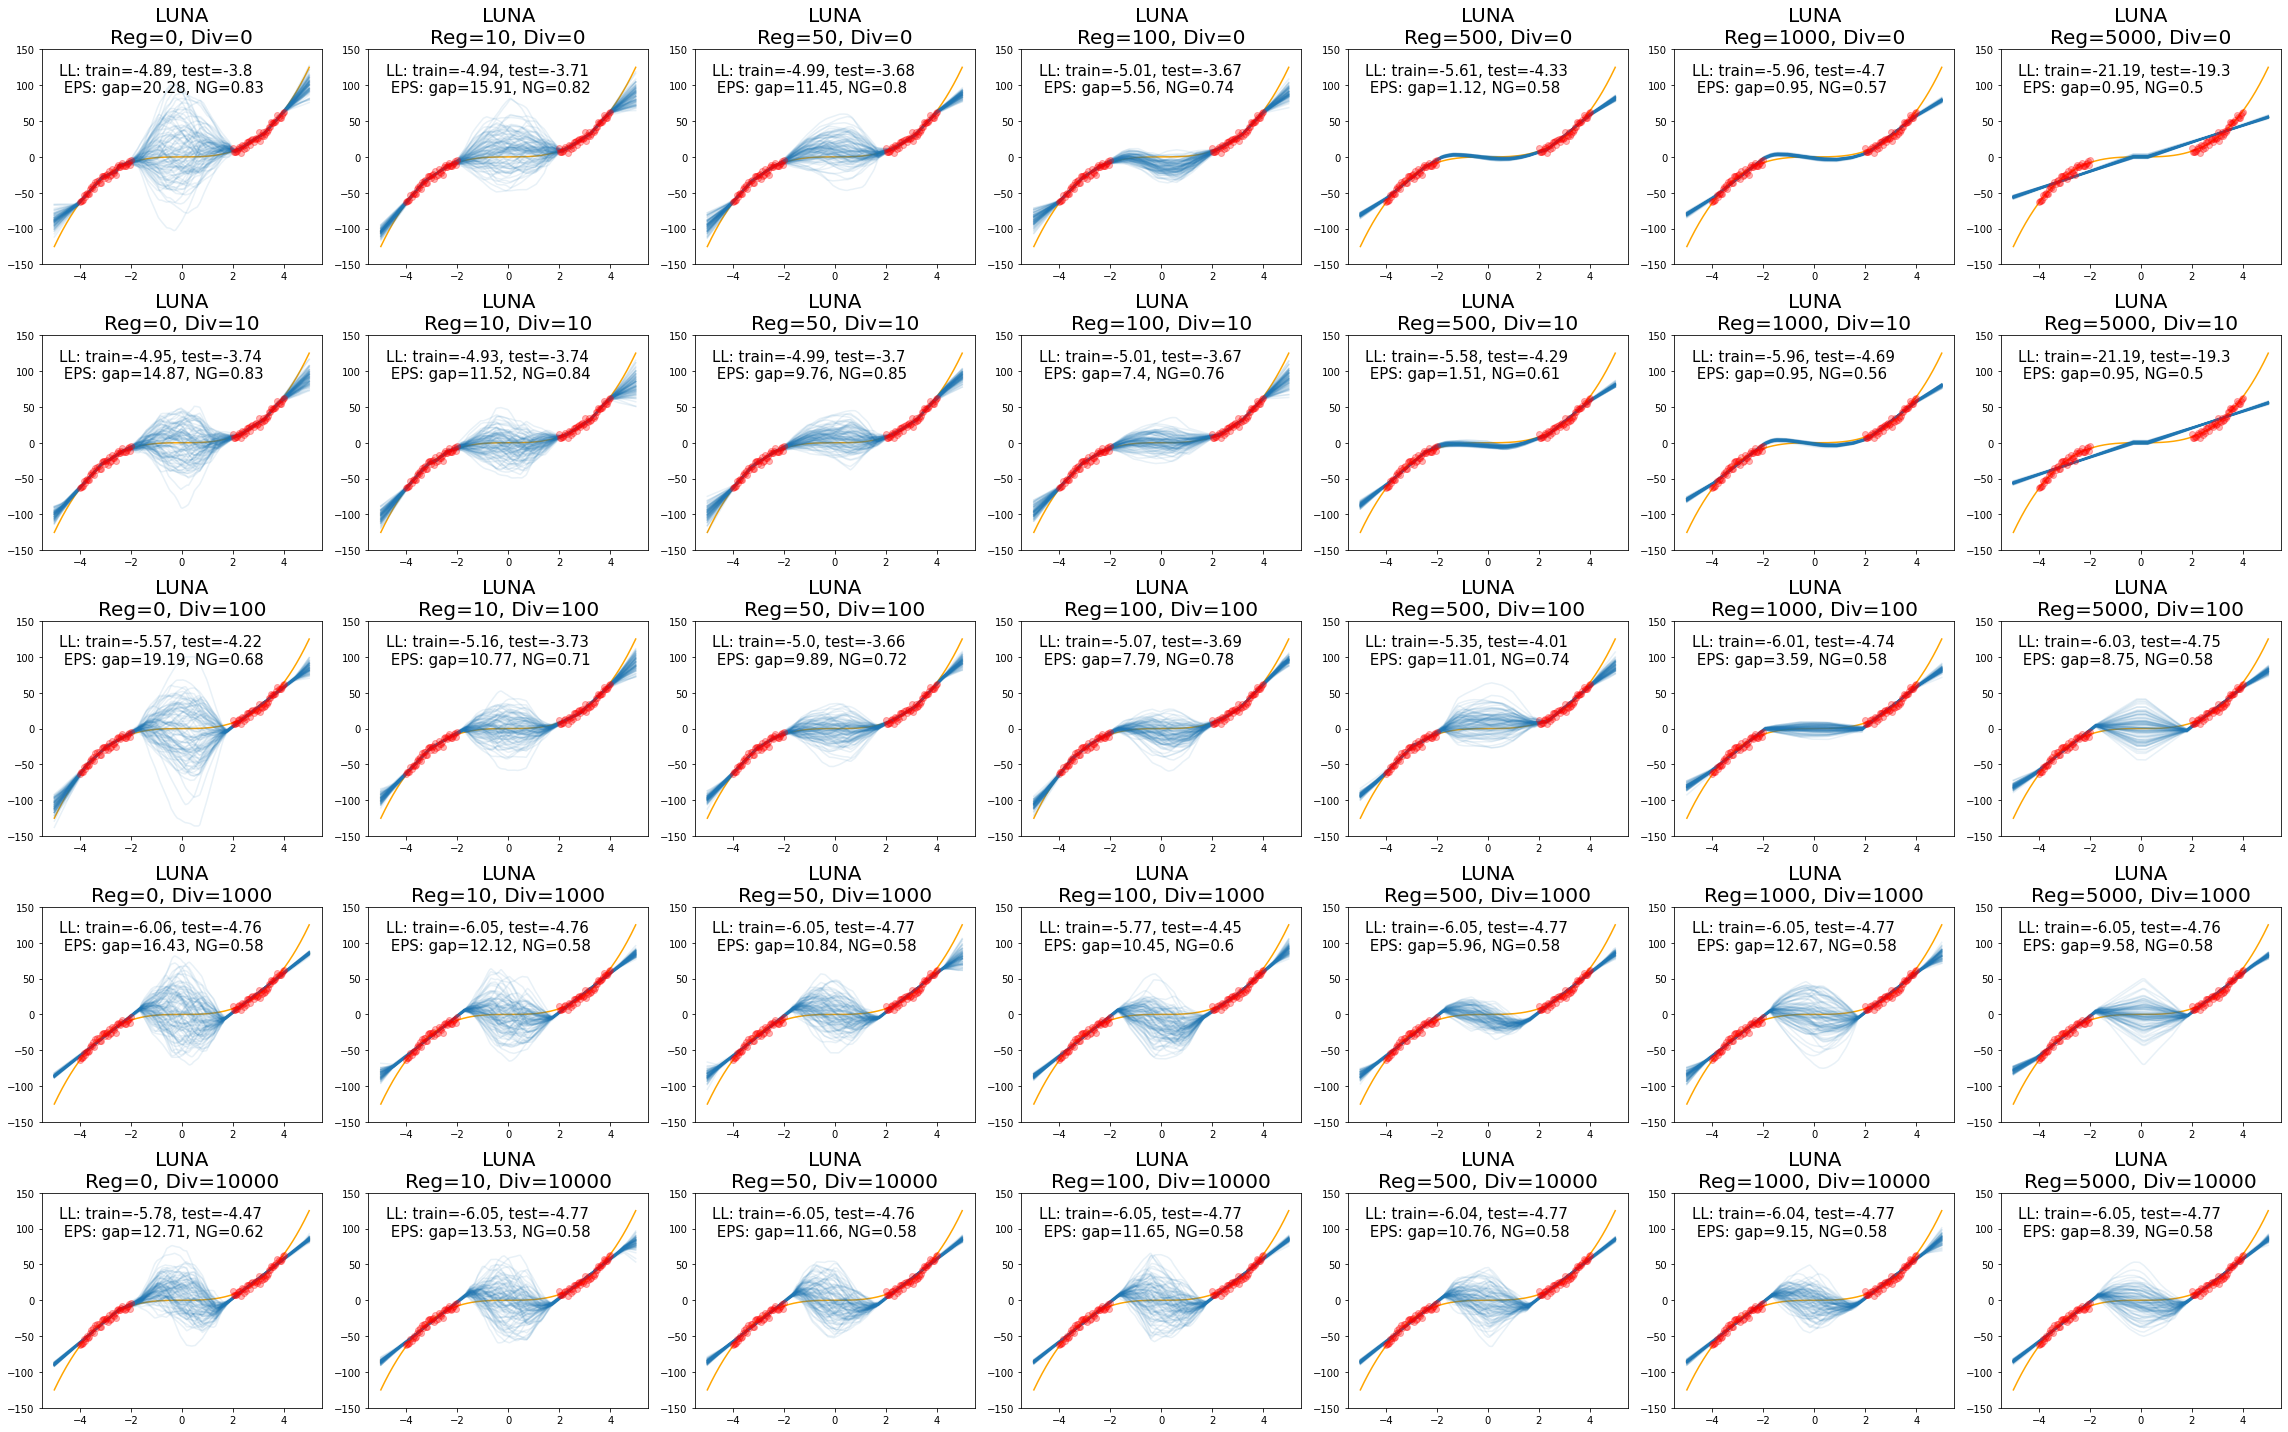

In [17]:
nll_train_list_nlm = []
nll_test_list_nlm = []
eps_gap_list_nlm = []
eps_non_gap_list_nlm = []

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_nlm.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_nlm.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\n EPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}", fontsize=15)
    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
#     ax.set_title(f"NLM\nReg={reg_grid[i]}\nLL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}",fontsize=20)

    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'post_samples_NLM_30_aux_5000_steps-3.png',dpi = 150)
plt.show()


nll_train_list_luna = []
nll_test_list_luna = []
eps_gap_list_luna = []
eps_non_gap_list_luna = []

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = luna.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = luna.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = luna.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_luna.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_luna.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\n EPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
#     ax.set_title(f"LUNA\nReg={luna.params['reg_param']}, Div={luna.params['lambda_in']}\nLL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}",fontsize=20)
#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=20)
#     ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'post_samples_LUNA_30_aux_5000_steps-3.png',dpi = 150)
plt.show()

## Plot posterior predictive intervals

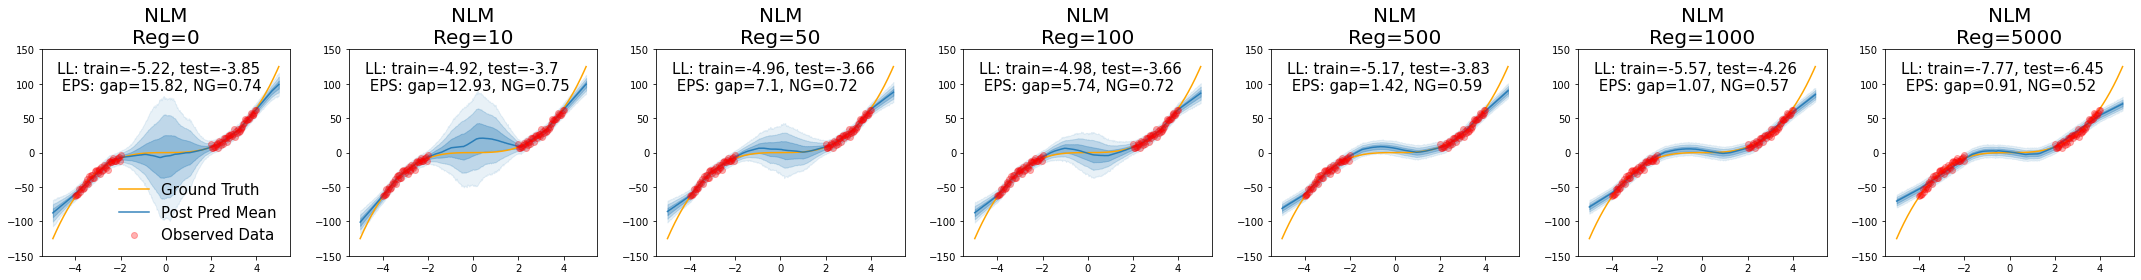

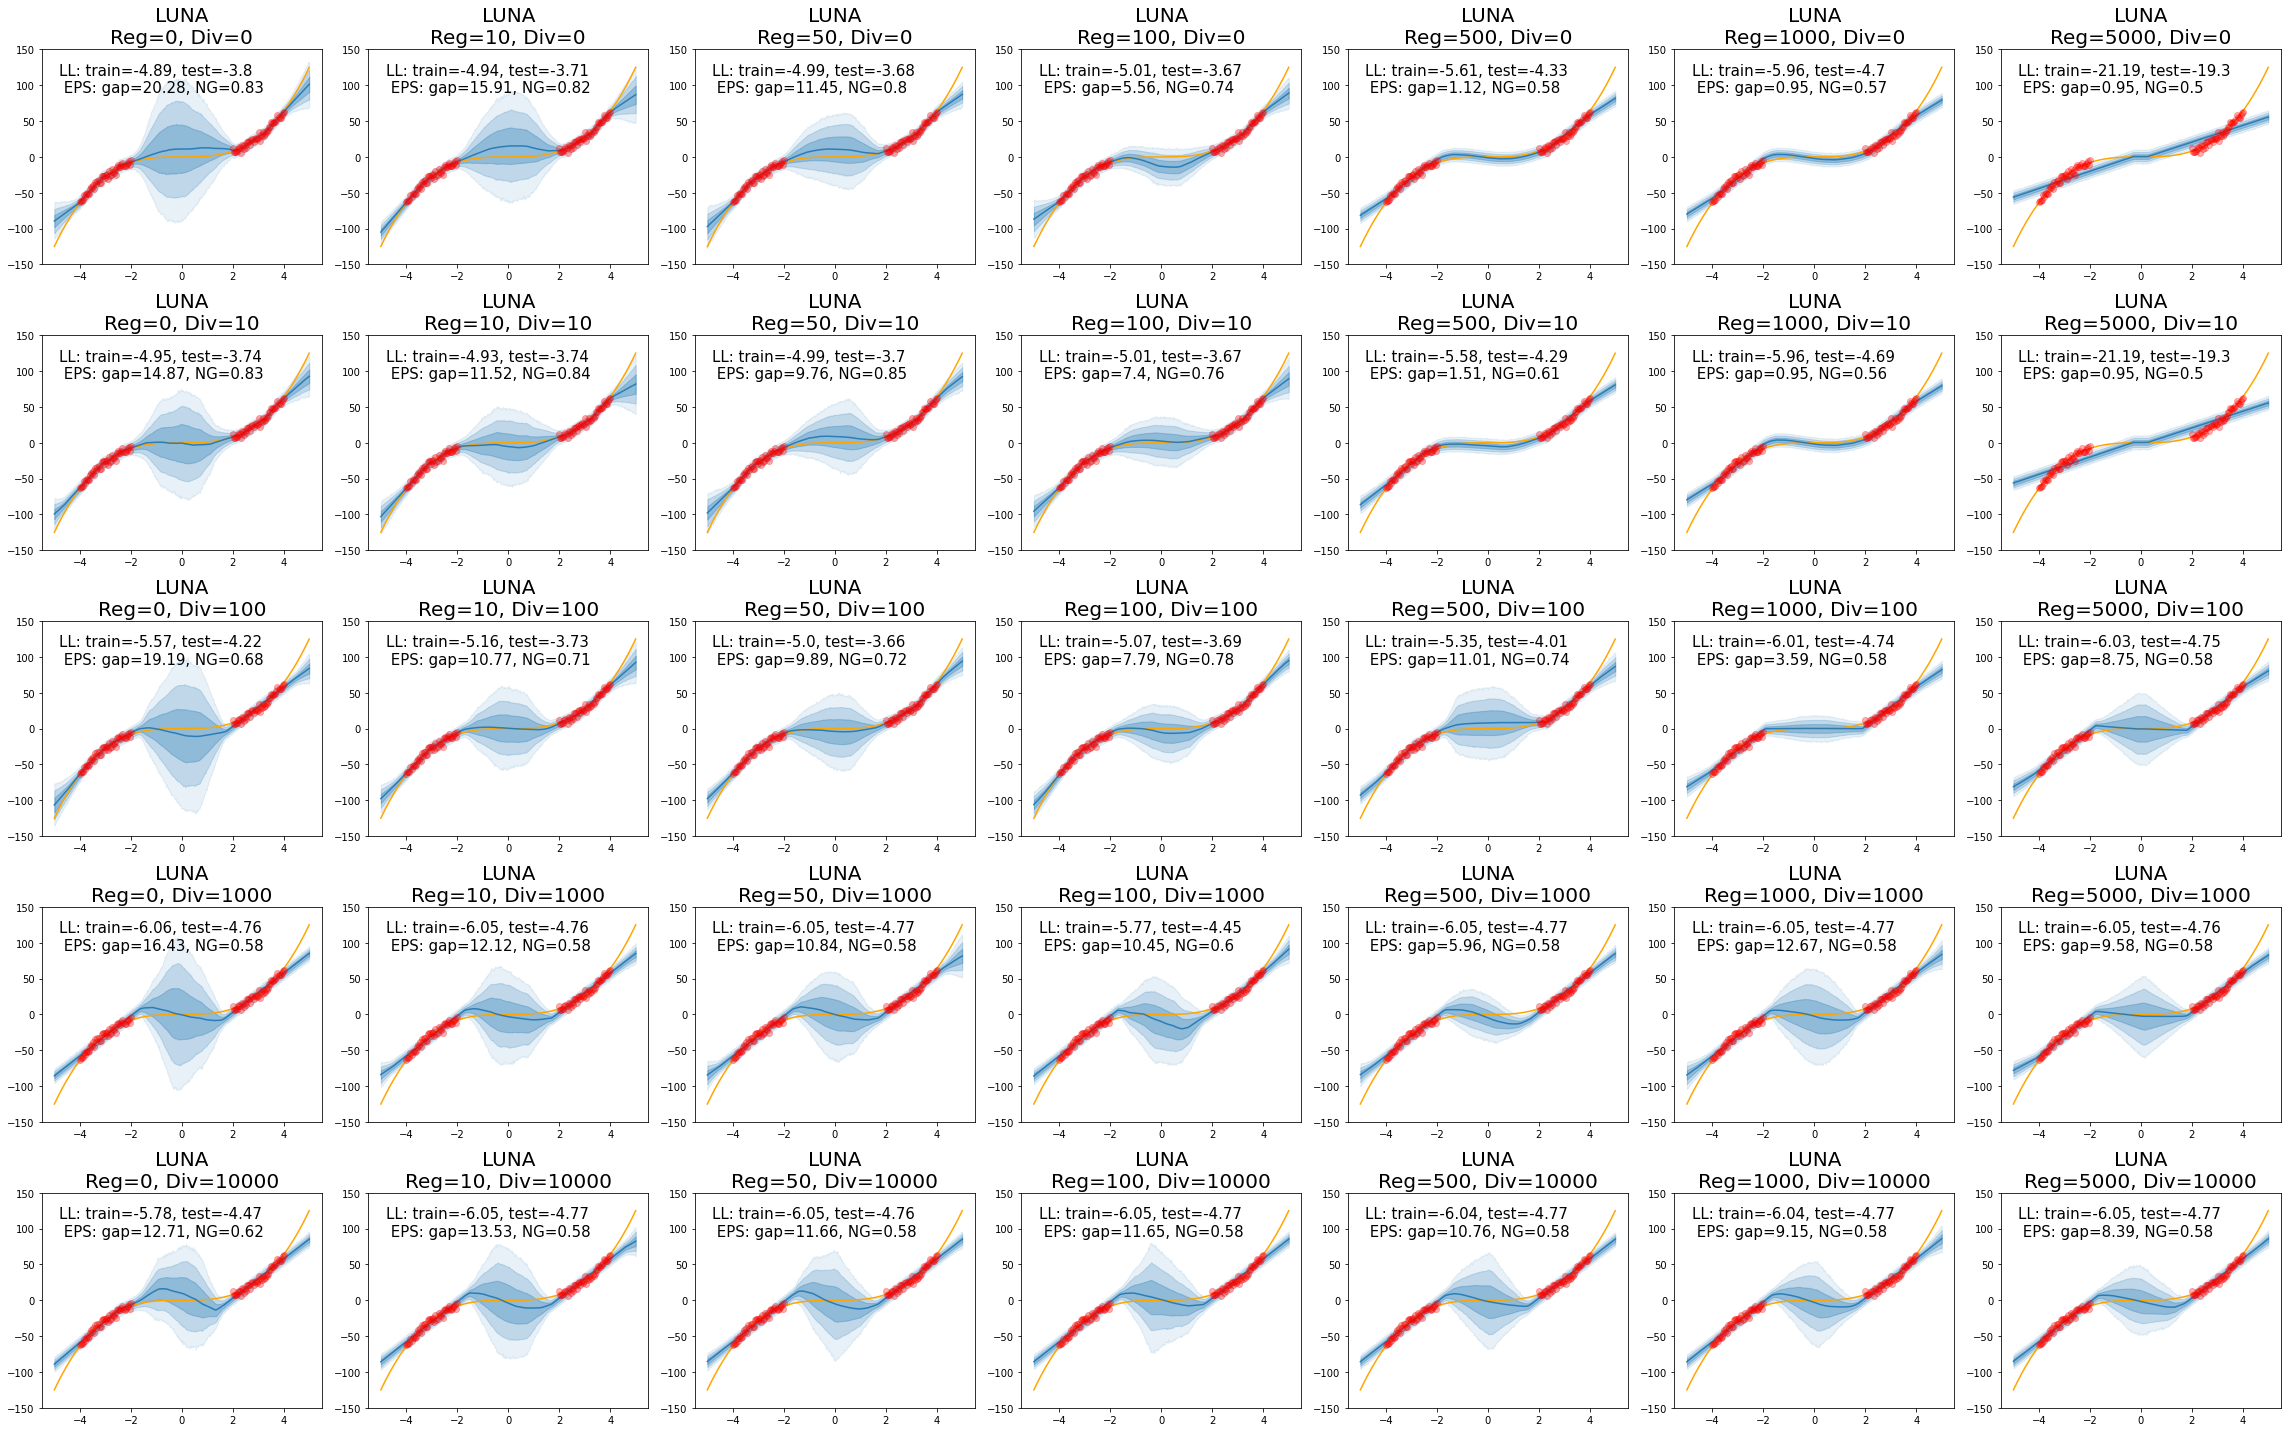

In [24]:
fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Post Pred Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\n EPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}", fontsize=15)
    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)

#     ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=20)

#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'PPI_NLM_30_aux_5000_steps-3.png',dpi = 150)
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])  
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\n EPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)

#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=20)
#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'PPI_LUNA_30_aux_5000_steps-3.png',dpi = 150)
plt.show()


## Evaluate model performance (log likelihood) and epistemic uncertainty

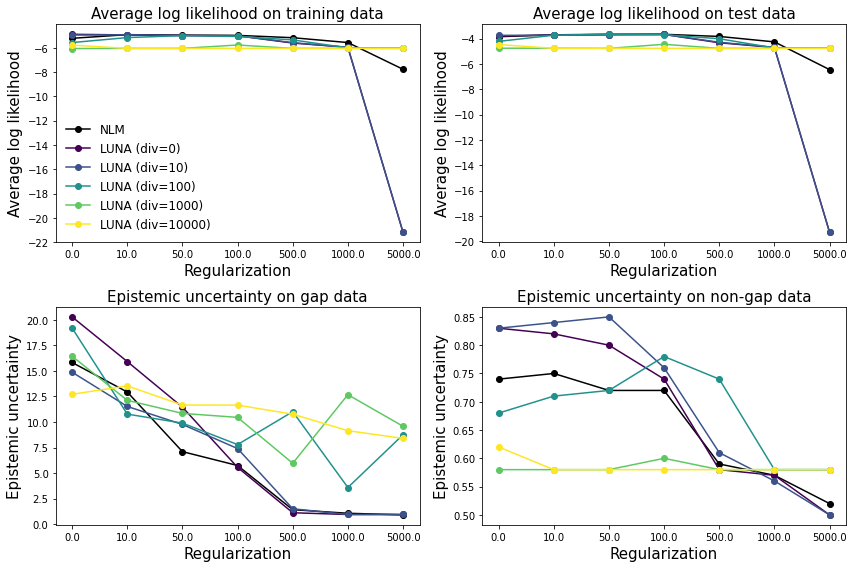

In [19]:
cmap = plt.get_cmap('viridis', len(div_grid))
fontsize = 15
fig, axes = plt.subplots(2,2,figsize = (12,8))
axes[0,0].plot(-np.array(nll_train_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,0].plot(-np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={int(div)})")
axes[0,0].set_xticks(range(len(reg_grid)))
axes[0,0].set_xticklabels(np.array(reg_grid))
axes[0,0].set_xlabel('Regularization',fontsize = fontsize)
axes[0,0].set_ylabel('Average log likelihood',fontsize = fontsize)
# axes[0,0].set_ylim([-23,-3])
axes[0,0].legend(frameon=False,fontsize = 12)
axes[0,0].set_title('Average log likelihood on training data',fontsize = fontsize)

axes[0,1].plot(-np.array(nll_test_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,1].plot(-np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[0,1].set_xticks(range(len(reg_grid)))
axes[0,1].set_xticklabels(np.array(reg_grid))
axes[0,1].set_xlabel('Regularization',fontsize = fontsize)
axes[0,1].set_ylabel('Average log likelihood',fontsize = fontsize)
# axes[0,1].set_ylim([-23,-3])
# axes[0,1].legend(frameon=False)
axes[0,1].set_title('Average log likelihood on test data',fontsize = fontsize)

axes[1,0].plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,0].plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[1,0].set_xticks(range(len(reg_grid)))
axes[1,0].set_xticklabels(np.array(reg_grid))
axes[1,0].set_xlabel('Regularization',fontsize = fontsize)
axes[1,0].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
# axes[1,0].set_ylim([0,22])
# axes[1,0].legend(frameon=False)
axes[1,0].set_title('Epistemic uncertainty on gap data',fontsize = fontsize)

axes[1,1].plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,1].plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[1,1].set_xticks(range(len(reg_grid)))
axes[1,1].set_xticklabels(np.array(reg_grid))
axes[1,1].set_xlabel('Regularization',fontsize = fontsize)
axes[1,1].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
# axes[1,1].set_ylim([0,22])
# axes[1,1].legend(frameon=False)
axes[1,1].set_title('Epistemic uncertainty on non-gap data',fontsize = fontsize)

plt.tight_layout()
plt.savefig(imagePath+'evaluation_30_aux_5000_steps-3.png',dpi = 150)
plt.show()

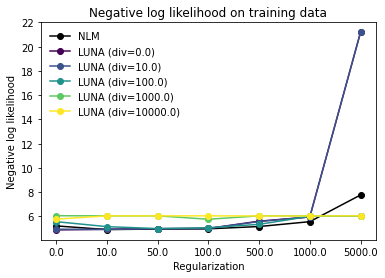

In [20]:
cmap = plt.get_cmap('viridis', len(div_grid))
plt.plot(nll_train_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on training data')
plt.show()

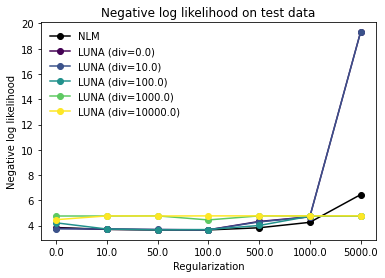

In [21]:
plt.plot(nll_test_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on test data')
plt.show()

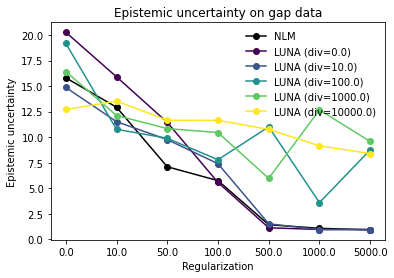

In [22]:
plt.plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on gap data')
plt.show()

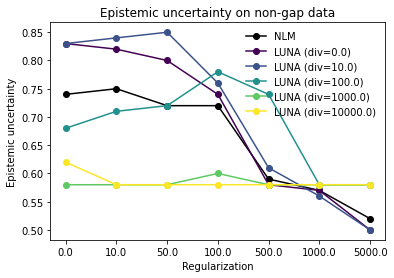

In [23]:
plt.plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on non-gap data')
plt.show()